In [4]:
import torch as t
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

In [5]:
t.manual_seed(1000)
np.random.seed(1) #对比

In [6]:
def get_fake_data(batch_size = 8):
    x = t.rand(batch_size,1)*20
    y = x*2 + (1 +t.randn(batch_size,1))*3
    return x,y

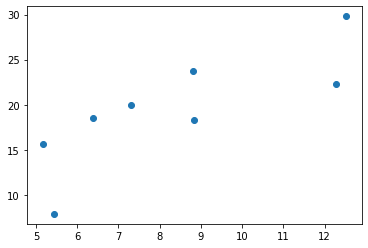

In [7]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

Both in Pytorch and Tensorflow, the `.numpy()` method is pretty much straightforward. It converts a tensor object into an `numpy.ndarray` object. This implicitly means that the converted tensor will <u>be now processed on the CPU</u>.

In [8]:
w = t.rand(1,1)
b = t.zeros(1,1)

tensor([[0.3915]])

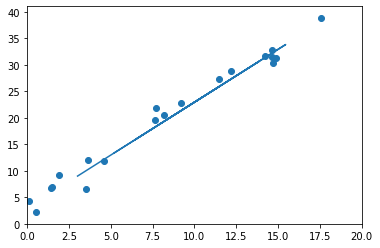

2.0147228 tensor(3.1163506508)


In [35]:
lr = 0.001
for ii in range(20000):
    x, y = get_fake_data()
    
    y_pred = x.mm(w) + b.expand_as(y)
    loss  = 0.5 *(y_pred-y)**2
    loss = loss.sum()
    
    dloss = 1
    dy_pred = (y_pred-y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if(ii%1000 == 0):
        display.clear_output(wait = True)
        x_test = t.arange(0,20)
        #print(x.shape, w.shape, y.shape)
        y = x.mm(w)+  b.expand_as(x)
        
        plt.plot(x.numpy(),y.numpy())
        
        x2,y2 = get_fake_data(batch_size = 20)
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
       
    
    
t.set_printoptions(precision = 10)
print(w.squeeze().data.numpy(), b.squeeze())